# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [2]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [9]:
cat=Table.read('../data/CDFS-SWIRE/SPIRE/dmu26_XID+SPIRE_CDFS-SWIRE_cat_20170919.fits')
from astropy import units as u
cat['RA'].unit=u.deg
cat['Dec'].unit=u.deg

In [10]:
cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
str27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J033650.824-295620.783,54.21176639,-29.939106486,0.995993,2.33363,0.263811,0.616454,1.5971,0.142773,1.18272,2.7005,0.340537,-2.0402,-3.32497,-4.0818,4.01101,4.46748,3.38119,0.999226,0.999213,0.998511,2000.0,2000.0,2000.0,0.623,0.914,0.126
HELP_J033655.442-295449.596,54.2310102146,-29.9137765914,24.34,26.8992,21.9835,20.9018,23.4067,18.4095,7.72681,10.3997,5.03711,-1.83075,-2.9838,-3.42963,3.91813,4.37977,3.1839,0.99927,0.998896,1.00079,2000.0,2000.0,2000.0,1.0,1.0,0.323
HELP_J033616.314-295548.181,54.0679762,-29.930050306,18.8116,21.9489,15.3939,18.0063,21.0129,14.6993,12.1488,15.0362,9.18645,2.20586,1.95144,1.3715,6.63458,6.82332,5.29211,0.998864,0.998838,0.998592,2000.0,2000.0,2000.0,1.0,1.0,0.994
HELP_J033601.094-295546.425,54.0045569,-29.929562436,12.1828,14.8346,9.59722,9.70458,12.7666,6.76455,11.7828,14.5772,9.07688,-0.240061,-1.04598,-2.1768,5.38059,5.72422,4.75818,0.998413,0.999065,0.998804,2000.0,2000.0,2000.0,1.0,1.0,1.0
HELP_J033606.888-295518.496,54.0287013,-29.921804496,1.4358,3.14216,0.425735,0.593445,1.62089,0.13063,0.669267,1.64673,0.174253,-0.240061,-1.04598,-2.1768,5.38059,5.72422,4.75818,0.999921,0.998946,0.999364,2000.0,2000.0,2000.0,0.997,1.0,0.978
HELP_J033607.350-295516.790,54.03062359,-29.921330436,1.38798,3.12051,0.380132,0.575154,1.39221,0.143415,0.596537,1.52188,0.139833,-0.240061,-1.04598,-2.1768,5.38059,5.72422,4.75818,1.00067,0.998972,0.998822,2000.0,2000.0,2000.0,0.996,1.0,0.978
HELP_J033610.856-295506.940,54.04523478,-29.918594406,23.5813,26.3156,20.9162,24.6963,27.5339,21.9579,13.7556,16.2466,11.118,-0.240061,-1.04598,-2.1768,5.38059,5.72422,4.75818,0.999043,0.998407,0.998824,2000.0,2000.0,2000.0,1.0,1.0,1.0
HELP_J033555.160-295410.647,53.97983175,-29.902957406,40.7146,43.2624,38.171,13.4268,16.3625,10.5172,3.00568,5.25267,1.02663,-0.240061,-1.04598,-2.1768,5.38059,5.72422,4.75818,0.999375,0.998507,1.00108,2000.0,2000.0,2000.0,0.996,1.0,0.99


## Look at Symmetry of PDFs to determine depth level of catalogue

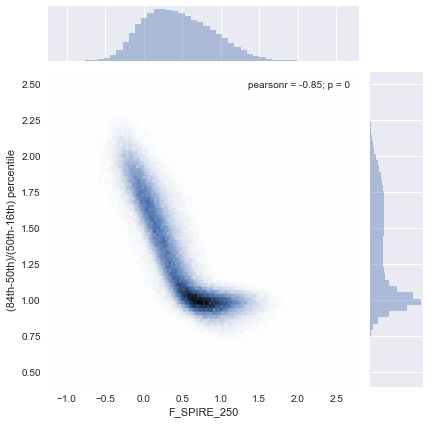

In [11]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

For 250 $\mathrm{\mu m}$ depth is ~ 4mJy

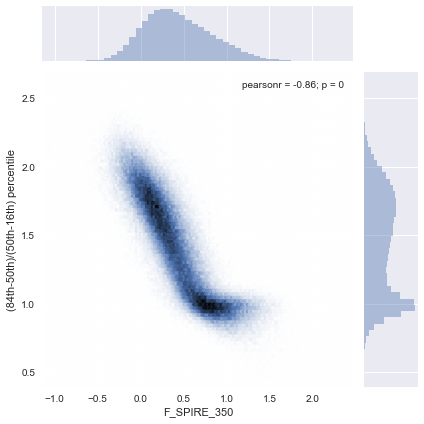

In [12]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

For 350 $\mathrm{\mu m}$ depth is ~ 4mJy

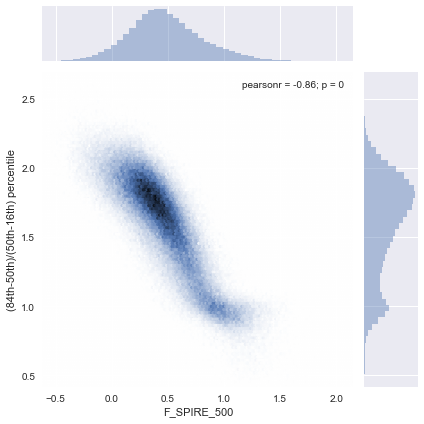

In [13]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

For 500 $\mathrm{\mu m}$ depth is ~ 6mJy

## Add flag to catalogue

In [19]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))



ValueError: Duplicate column names

In [23]:
ind_SERVS_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 4)
ind_SERVS_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 4)
ind_SERVS_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 6)


In [24]:
print(ind_SERVS_250.sum(),ind_SERVS_350.sum(),ind_SERVS_500.sum(),len(cat))

171877 180533 205273 239255


In [25]:
cat['flag_spire_250'][ind_SERVS_250]=True
cat['flag_spire_350'][ind_SERVS_350]=True
cat['flag_spire_500'][ind_SERVS_500]=True


In [26]:
cat.write('../data/CDFS-SWIRE/SPIRE/dmu26_XID+SPIRE_CDFS-SWIRE_cat_20170919.fits', format='fits',overwrite=True)
